In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

In [15]:
df=pd.read_csv('apartment_for_rent2.csv')

In [16]:
df.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [17]:
df.tail()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
99821,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,NaN,...,780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1.544186e+09
99822,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,"Cats,Dogs",...,813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1.544186e+09
99823,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,"Cats,Dogs",...,1325,Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09
99824,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,"Cats,Dogs",...,931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1.544186e+09
99825,housing/rent/apartment,Large Remodeled Two BR 1. Five BA Apartment Home,This is a brand new 2 Beds 1. five Bathrooms A...,"Gated,Parking,Wood Floors",1.5,2.0,USD,No,Yes,NaN,...,1595,Monthly,900,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

In [19]:
df.describe()

,price,latitude,longitude,time
count,99821.000000,9.979700e+04,99795.000000,9.982000e+04
mean,1527.208493,3.147604e+04,-91.562177,1.559690e+09
std,903.635759,7.022820e+06,15.819296,1.104487e+07
min,100.000000,1.957380e+01,-159.369800,1.544174e+09
25%,1014.000000,3.374960e+01,-104.791900,1.550832e+09
50%,1350.000000,3.722970e+01,-84.562300,1.568745e+09
75%,1795.000000,3.995390e+01,-77.585300,1.568767e+09
max,52500.000000,1.568782e+09,-68.778800,1.577391e+09


In [20]:
df.shape

(99826, 21)

In [21]:
df.columns

Index(['category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [22]:
df.isnull().sum()

category             0
title                0
body                 0
amenities        16077
bathrooms           66
bedrooms           127
currency             4
fee                  3
has_photo            3
pets_allowed     60634
price                5
price_display        6
price_type           3
square_feet          3
address          91880
cityname           305
state              305
latitude            29
longitude           31
source               6
time                 6
dtype: int64

In [23]:
df=df.dropna(subset=['price'])

In [24]:
df['amenities'] = df['amenities'].fillna('None')
df['pets_allowed'] = df['pets_allowed'].fillna('None')
df['price_display'] = df['price_display'].fillna('Unknown')
df['price_type'] = df['price_type'].fillna('Unknown')
df['source'] = df['source'].fillna('Unknown')

In [25]:
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')

In [26]:
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['square_feet'].fillna(df['square_feet'].median(), inplace=True)

In [27]:
#missing location
df.dropna(subset=['latitude', 'longitude'], inplace=True)

In [28]:
df.dropna(subset=['cityname', 'state'], inplace=True)

In [29]:
df.duplicated().sum()

84

In [30]:
df.shape

(99517, 21)

In [31]:
df= df.drop_duplicates()

In [32]:
df.shape

(99433, 21)

In [33]:
df.duplicated().sum()

0

In [34]:
df.isnull().sum()

category             0
title                0
body                 0
amenities            0
bathrooms            0
bedrooms             0
currency             0
fee                  0
has_photo            0
pets_allowed         0
price                0
price_display        0
price_type           0
square_feet          0
address          91564
cityname             0
state                0
latitude             0
longitude            0
source               0
time                 0
dtype: int64

In [35]:
df=df.drop(columns=['address'])

In [36]:
df.isnull().sum()

category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64

In [37]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99821    False
99822    False
99823    False
99824    False
99825    False
Length: 99433, dtype: bool

In [38]:
df.duplicated().sum()

0

In [39]:
num_cols=df.select_dtypes(include=['number'])
num_cols

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
0,1.0,1.0,2195.0,542.0,33.8520,-118.3759,1.577360e+09
1,1.5,3.0,1250.0,1500.0,37.0867,-76.4941,1.577360e+09
2,2.0,3.0,1395.0,1650.0,35.8230,-78.6438,1.577360e+09
3,1.0,2.0,1600.0,820.0,38.3622,-121.9712,1.577360e+09
4,1.0,1.0,975.0,624.0,35.1038,-106.6110,1.577360e+09
...,...,...,...,...,...,...,...
99821,1.0,1.0,780.0,605.0,29.6151,-95.1998,1.544186e+09
99822,2.0,2.0,813.0,921.0,30.2254,-81.7579,1.544186e+09
99823,1.0,1.0,1325.0,650.0,32.7379,-117.0914,1.544186e+09
99824,1.0,1.0,931.0,701.0,35.4158,-80.8451,1.544186e+09


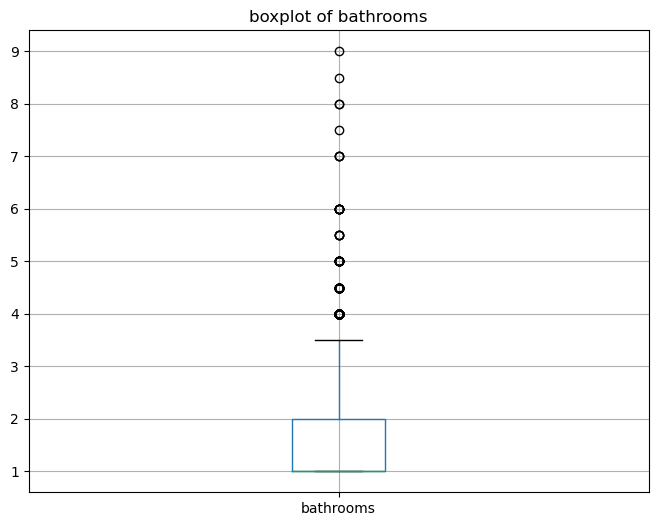

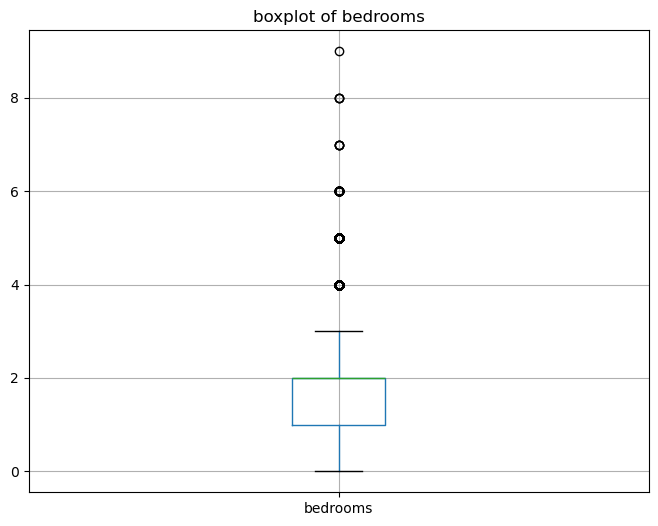

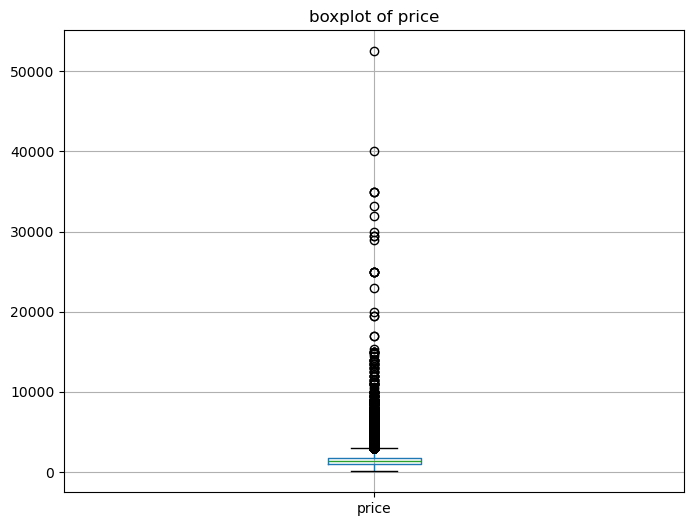

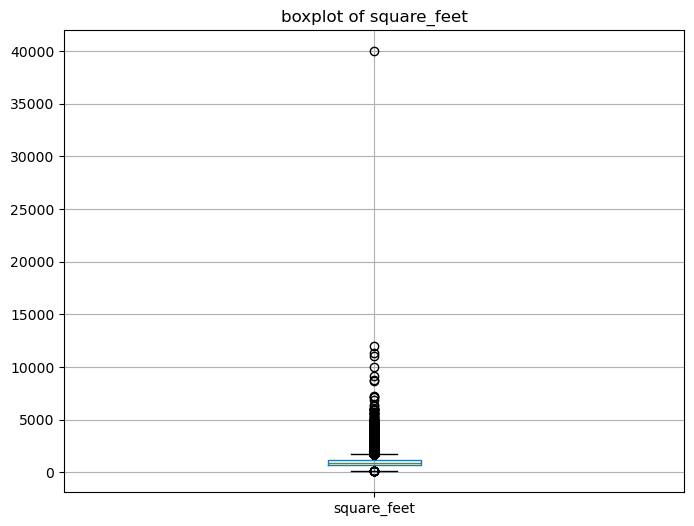

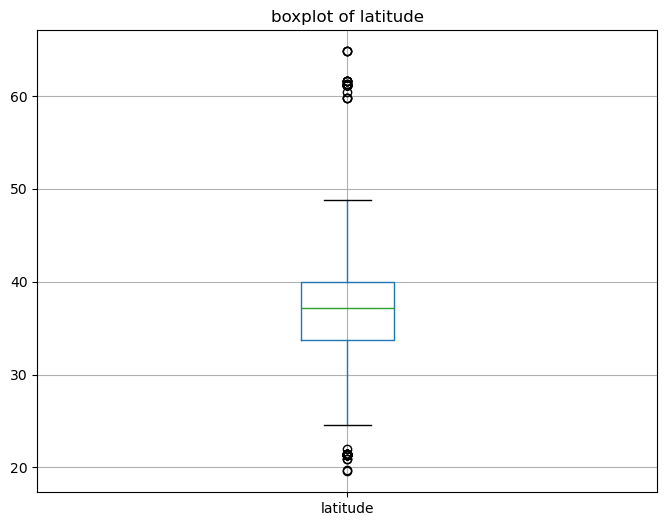

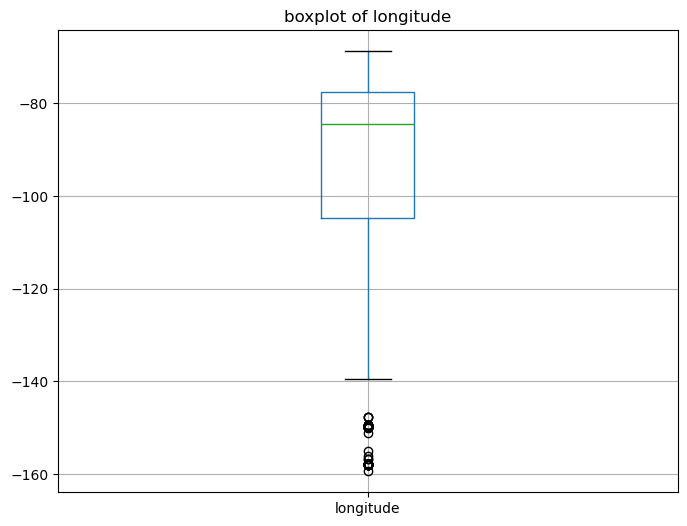

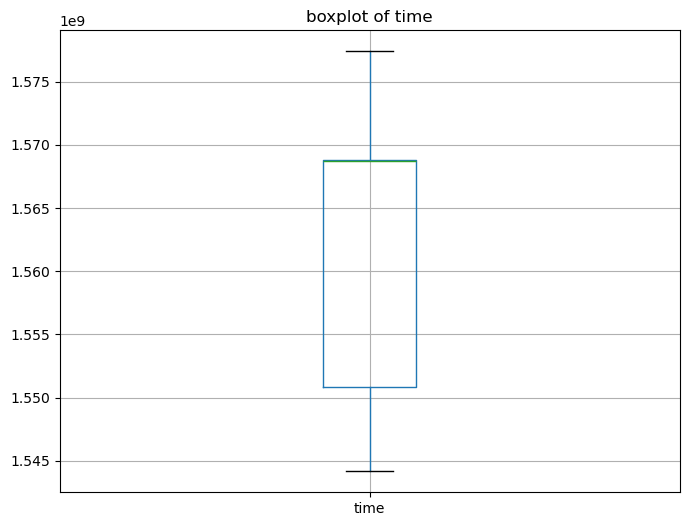

In [40]:
for column in num_cols.columns:
    plt.figure(figsize=(8,6))
    num_cols.boxplot(column=column)
    plt.title(f'boxplot of {column}')

In [41]:
def remove_outliers_iqr(data):
    if data.dtype == 'object':
        return data
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]
df = df.apply(remove_outliers_iqr)

In [42]:
#Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
#outlier removal function to numeric columns
df[numeric_cols] = df[numeric_cols].apply(remove_outliers_iqr)

In [43]:
print(df.head())

                 category                            title  \
0  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  housing/rent/apartment      Three BR 146 Lochview Drive   
2  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  housing/rent/apartment            Two BR 209 Aegean Way   
4  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body amenities  bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...      None        1.0   
1  This unit is located at 146 Lochview Drive, Ne...      None        1.5   
2  This unit is located at 3101 Morningside Drive...      None        2.0   
3  This unit is located at 209 Aegean Way, Vacavi...      None        1.0   
4  This unit is located at 4805 Marquette NE, Alb...      None        1.0   

   bedrooms currency fee  has_photo pets_allowed   price price_display  \
0       1.0      USD  No  Thumbnail         Cats  2195.0          2195   
1       3.0     

In [44]:
print(df.describe())

          bathrooms      bedrooms         price   square_feet      latitude  \
count  99231.000000  97599.000000  93298.000000  96400.000000  99344.000000   
mean       1.439021      1.681595   1378.793307    915.144305     36.934088   
std        0.528928      0.668343    497.557313    257.419607      4.560430   
min        1.000000      0.000000    100.000000    175.000000     24.564500   
25%        1.000000      1.000000    995.000000    725.000000     33.746500   
50%        1.000000      2.000000   1309.000000    895.000000     37.213900   
75%        2.000000      2.000000   1685.000000   1100.000000     39.955900   
max        3.500000      3.000000   2751.000000   1662.000000     48.846700   

          longitude          time  
count  99347.000000  9.943300e+04  
mean     -91.496269  1.559677e+09  
std       15.738897  1.104436e+07  
min     -139.553200  1.544174e+09  
25%     -104.791900  1.550832e+09  
50%      -84.539400  1.568745e+09  
75%      -77.576700  1.568767e+09  


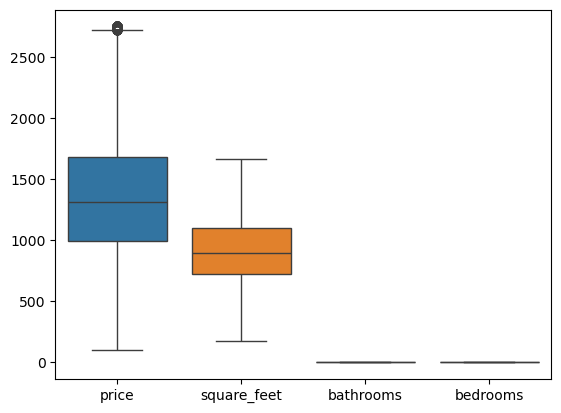

In [45]:
sns.boxplot(data=df[['price', 'square_feet', 'bathrooms', 'bedrooms']])
plt.show()

In [46]:
print(df[df['price'] > df['price'].quantile(0.95)])
print(df[df['square_feet'] > df['square_feet'].quantile(0.95)])

                     category  \
12     housing/rent/apartment   
41     housing/rent/apartment   
46     housing/rent/apartment   
79     housing/rent/apartment   
83     housing/rent/apartment   
...                       ...   
99740  housing/rent/apartment   
99743  housing/rent/apartment   
99761  housing/rent/apartment   
99772  housing/rent/apartment   
99812  housing/rent/apartment   

                                                   title  \
12                   Two BR 2537 North Capitol Street NE   
41                             Two BR 3946 Angelo Avenue   
46                               Two BR 5235 Kester Ave.   
79                             One BR 3101 Charlotte Ave   
83                          Two BR 3707 Woodley Road, NW   
...                                                  ...   
99740  Lovely Agoura Hills, One BR, One BA. Single Ca...   
99743  One BR Apartment - a newly acquired community ...   
99761  Convenient location Three BR Two BA for rent. ...   
997

In [47]:
df_original = df.copy()

In [48]:
print(f"Original data size: {len(df_original)}")
print(f"Data size after outlier removal: {len(df)}")

Original data size: 99433
Data size after outlier removal: 99433


In [49]:
print(df.describe())
print(df[df['price'] > 3000])

          bathrooms      bedrooms         price   square_feet      latitude  \
count  99231.000000  97599.000000  93298.000000  96400.000000  99344.000000   
mean       1.439021      1.681595   1378.793307    915.144305     36.934088   
std        0.528928      0.668343    497.557313    257.419607      4.560430   
min        1.000000      0.000000    100.000000    175.000000     24.564500   
25%        1.000000      1.000000    995.000000    725.000000     33.746500   
50%        1.000000      2.000000   1309.000000    895.000000     37.213900   
75%        2.000000      2.000000   1685.000000   1100.000000     39.955900   
max        3.500000      3.000000   2751.000000   1662.000000     48.846700   

          longitude          time  
count  99347.000000  9.943300e+04  
mean     -91.496269  1.559677e+09  
std       15.738897  1.104436e+07  
min     -139.553200  1.544174e+09  
25%     -104.791900  1.550832e+09  
50%      -84.539400  1.568745e+09  
75%      -77.576700  1.568767e+09  


In [50]:
from scipy import stats

z_scores = stats.zscore(df[['price', 'square_feet', 'bathrooms']])
outliers = (z_scores > 3) | (z_scores < -3) 
outlier_rows = df[outliers.any(axis=1)]

print(outlier_rows)

Empty DataFrame
Columns: [category, title, body, amenities, bathrooms, bedrooms, currency, fee, has_photo, pets_allowed, price, price_display, price_type, square_feet, cityname, state, latitude, longitude, source, time]
Index: []


In [51]:
print(f"Outliers detected: {len(outlier_rows)}")

Outliers detected: 0


In [52]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

bathrooms      0.638244
bedrooms       0.334891
price          0.591266
square_feet    0.283464
latitude      -0.052818
longitude     -0.599819
time          -0.066266
dtype: float64


In [53]:
df['log_price'] = np.log1p(df['price'])
df['log_square_feet'] = np.log1p(df['square_feet'])
print(df[['log_price', 'log_square_feet']].skew())

log_price         -0.213571
log_square_feet   -0.565606
dtype: float64


In [54]:
pt=PowerTransformer(method = 'yeo-johnson')

In [55]:
numerical_features=df.select_dtypes(include=['float64', 'int64']).columns

In [56]:
df[numerical_features]=pt.fit_transform(df[numerical_features])

In [57]:
df[numerical_features]

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time,log_price,log_square_feet
0,-0.863569,-1.034074,1.493963,-1.527880,-0.680819,-1.488498,1.647356,1.492048,-1.531187
1,0.484372,1.785633,-0.129016,2.088975,0.025640,1.034501,1.647354,-0.127511,2.081677
2,1.148765,1.785633,0.171018,2.555764,-0.251318,0.813632,1.647354,0.172919,2.540998
3,-0.863569,0.543178,0.556683,-0.318263,0.306397,-1.602594,1.647353,0.558522,-0.317831
4,-0.863569,-1.034074,-0.780801,-1.149792,-0.408393,-1.040745,1.647351,-0.781038,-1.152552
...,...,...,...,...,...,...,...,...,...
99821,-0.863569,-1.034074,-1.335109,-1.235557,-1.593227,-0.458708,-1.378833,-1.337105,-1.238535
99822,1.148765,0.543178,-1.234326,0.079137,-1.462759,0.520937,-1.378834,-1.236022,0.080883
99823,-0.863569,-1.034074,0.029331,-1.034082,-0.922212,-1.445437,-1.378836,0.031088,-1.036489
99824,-0.863569,-1.034074,-0.897870,-0.812295,-0.340301,0.603609,-1.378841,-0.898486,-0.813884


In [58]:
df[numerical_features].skew()

bathrooms          0.331499
bedrooms          -0.013170
price             -0.013313
square_feet       -0.011170
latitude          -0.010093
longitude         -0.121148
time              -0.032546
log_price         -0.019962
log_square_feet   -0.014555
dtype: float64

# 6.Exploratory Data Analysis (EDA)

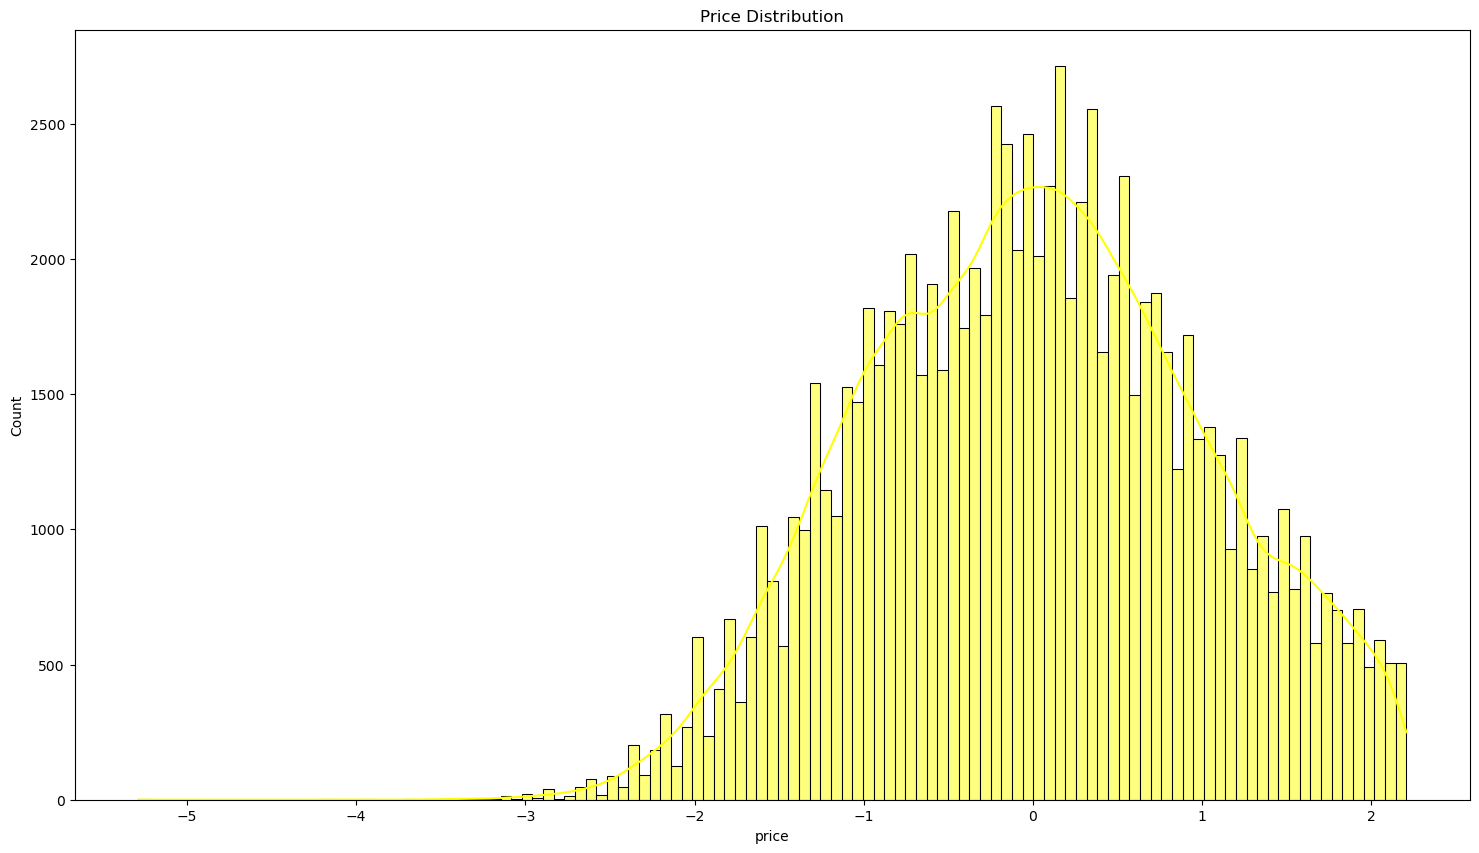

In [60]:
# Visualize the distribution of 'price'
plt.figure(figsize=(18, 10))
sns.histplot(df['price'], kde=True, color='yellow')
plt.title('Price Distribution')
plt.show()

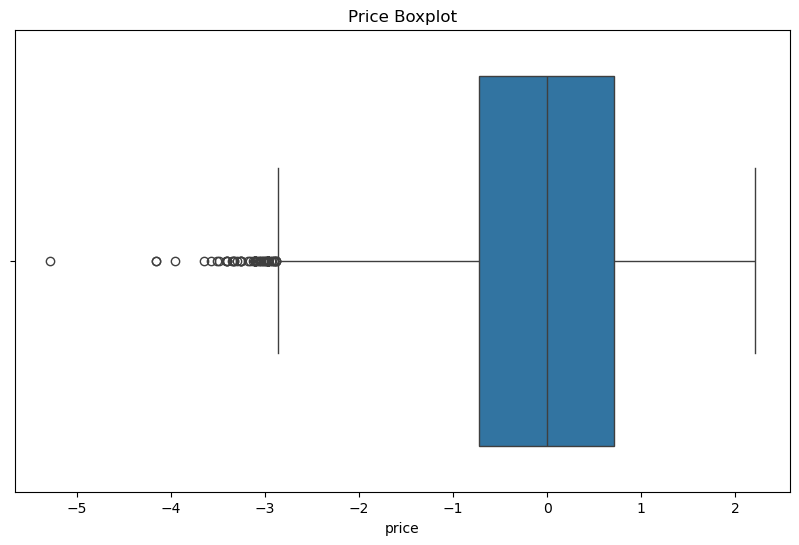

In [61]:
# Boxplot for 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Price Boxplot')
plt.show()

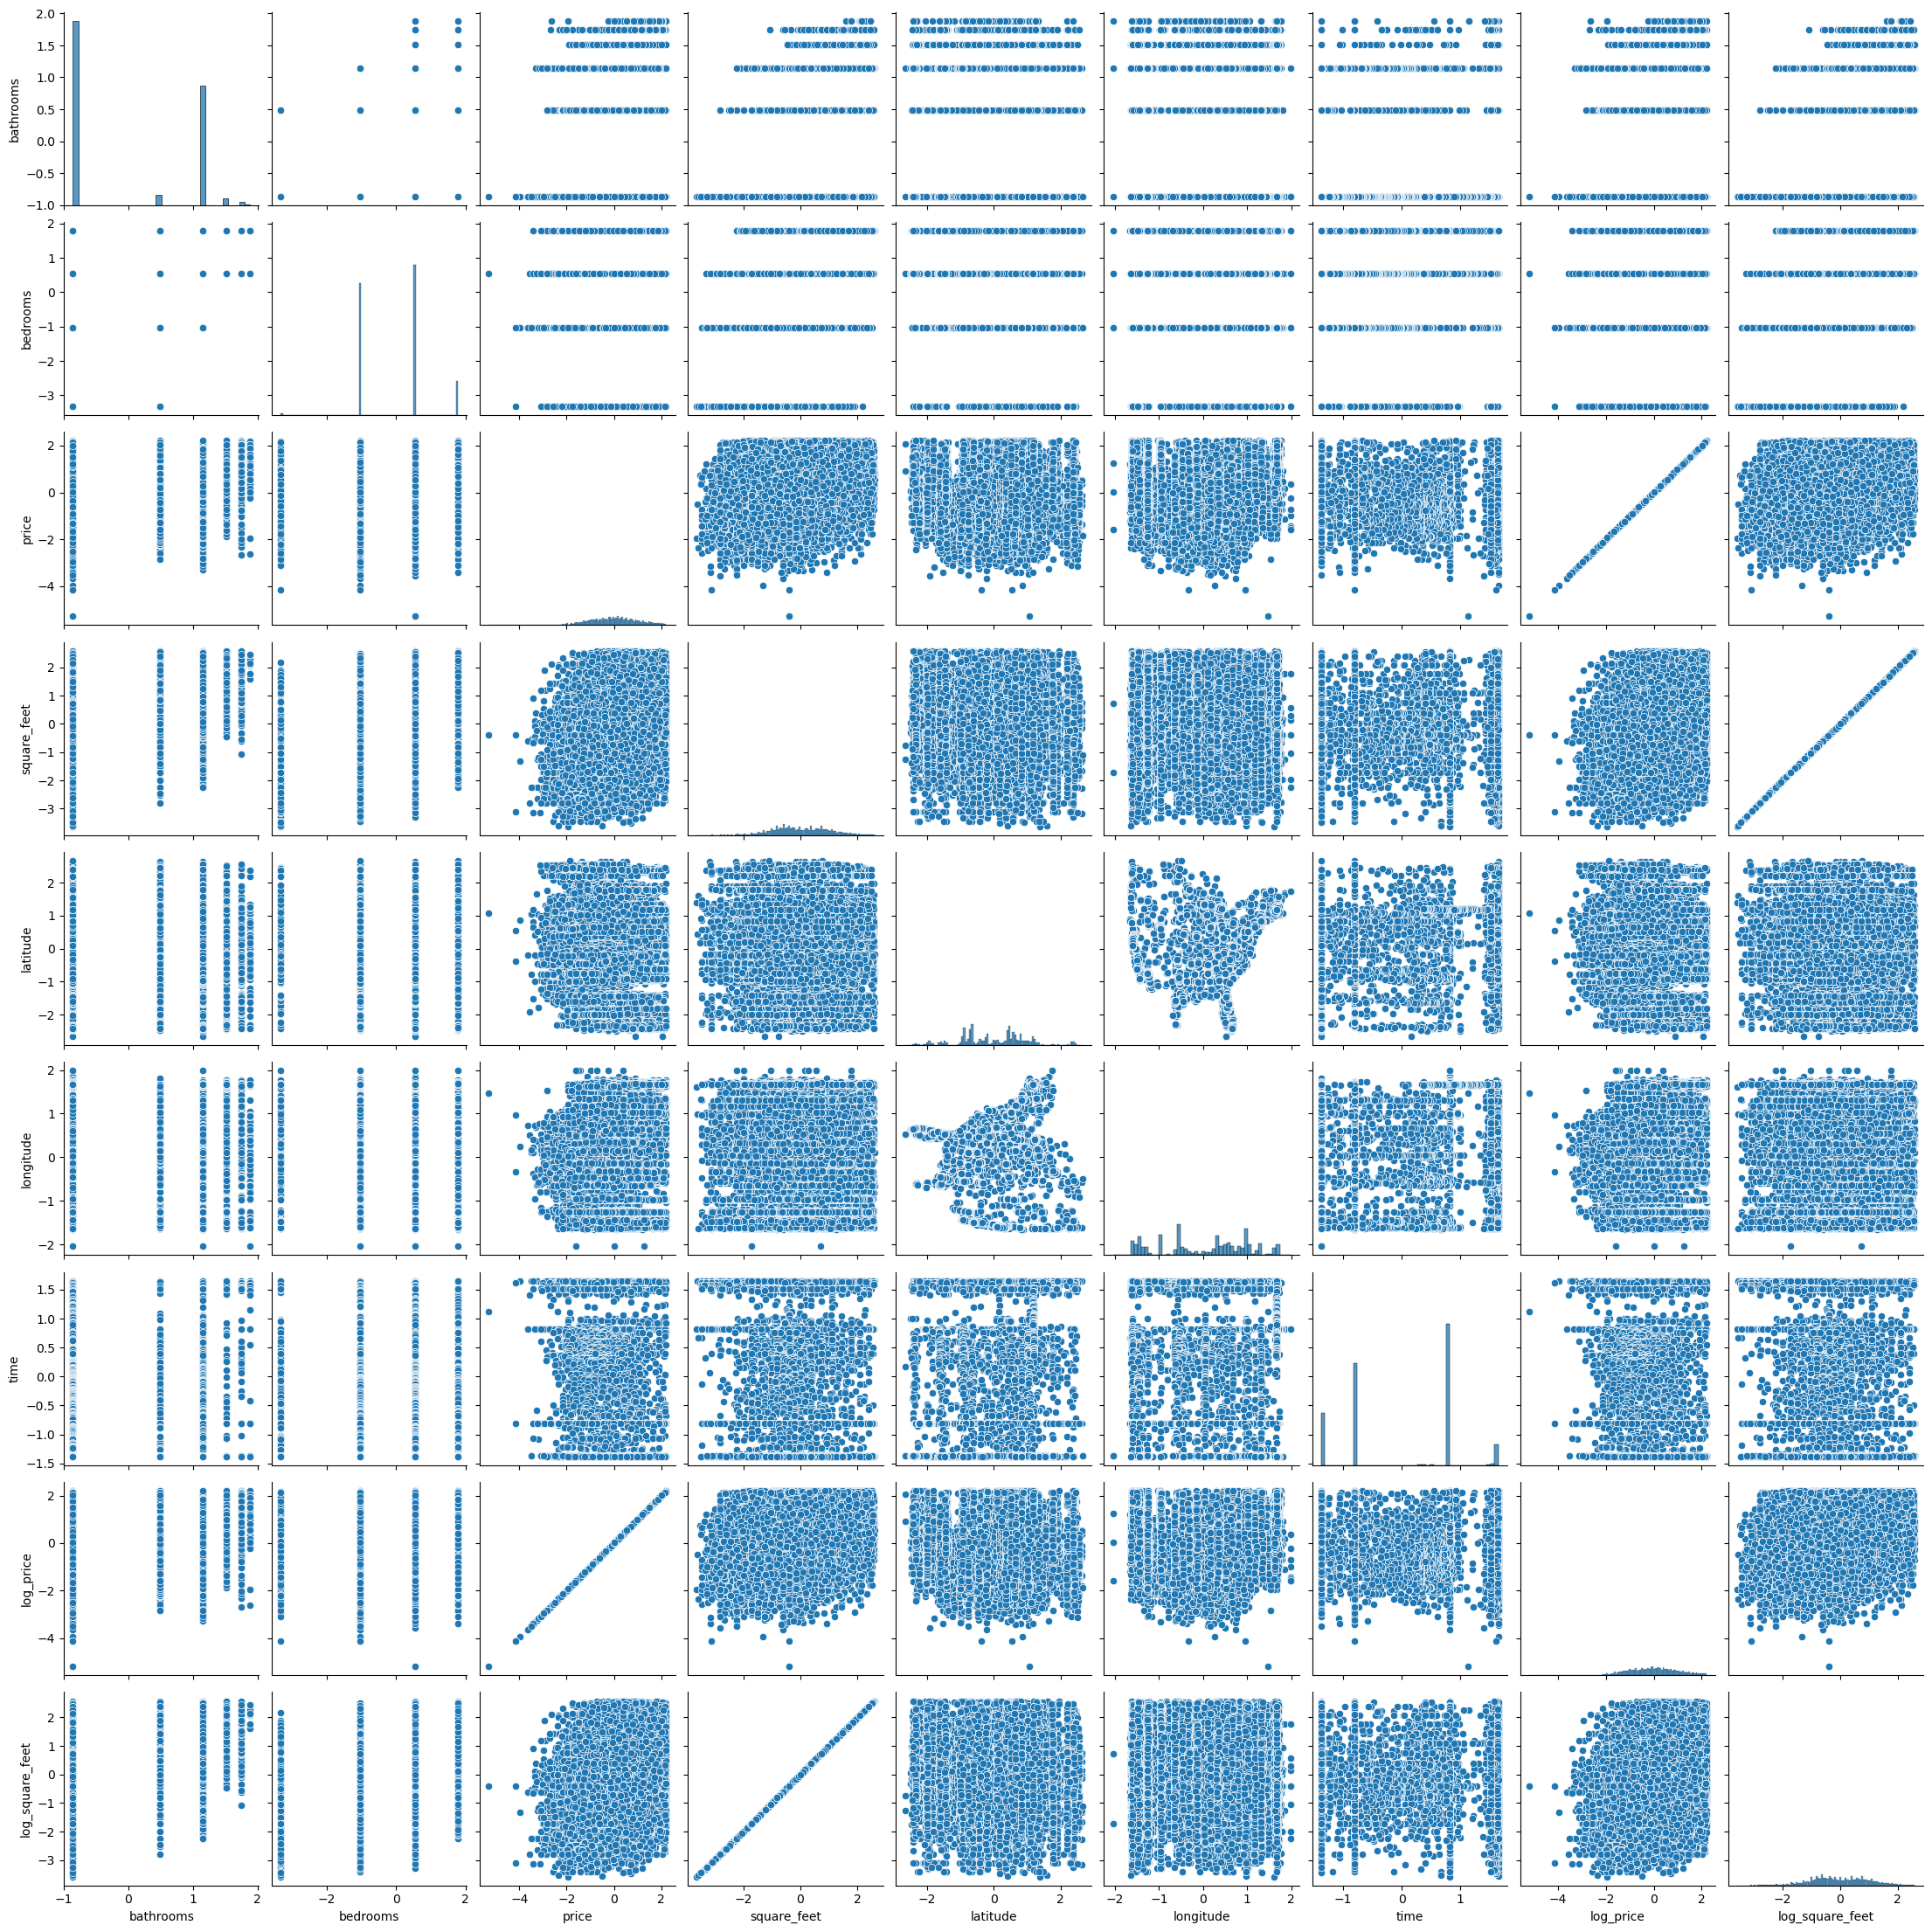

In [62]:
# Pair plot to  relationships between numerical features
sns.pairplot(df)
plt.show()

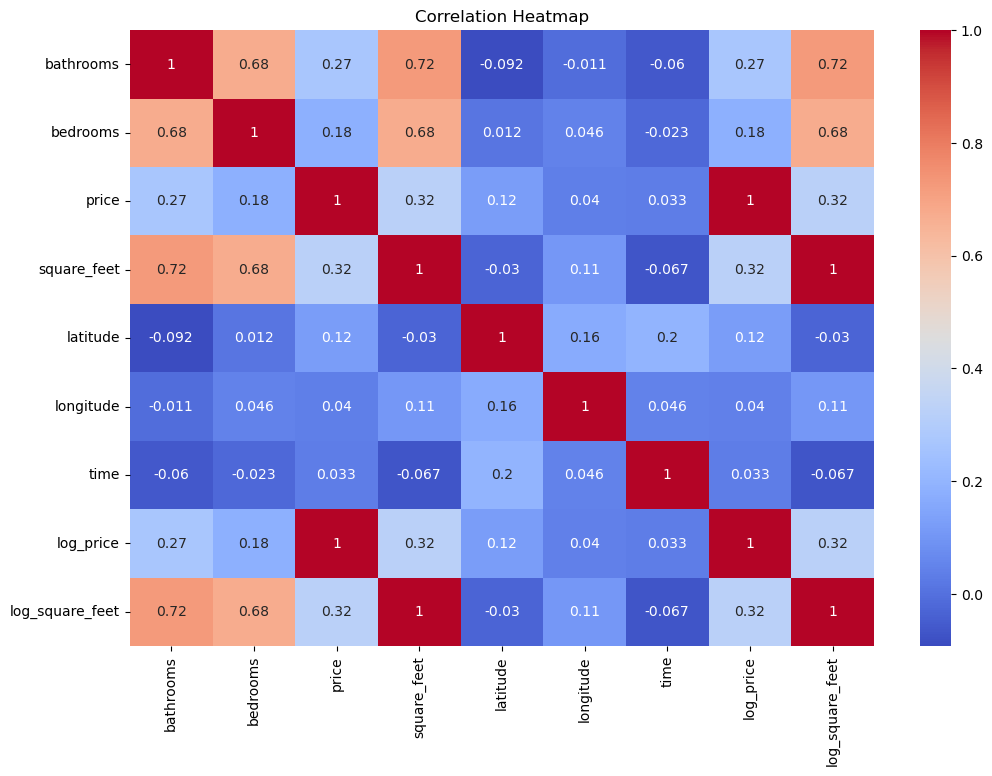

In [63]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

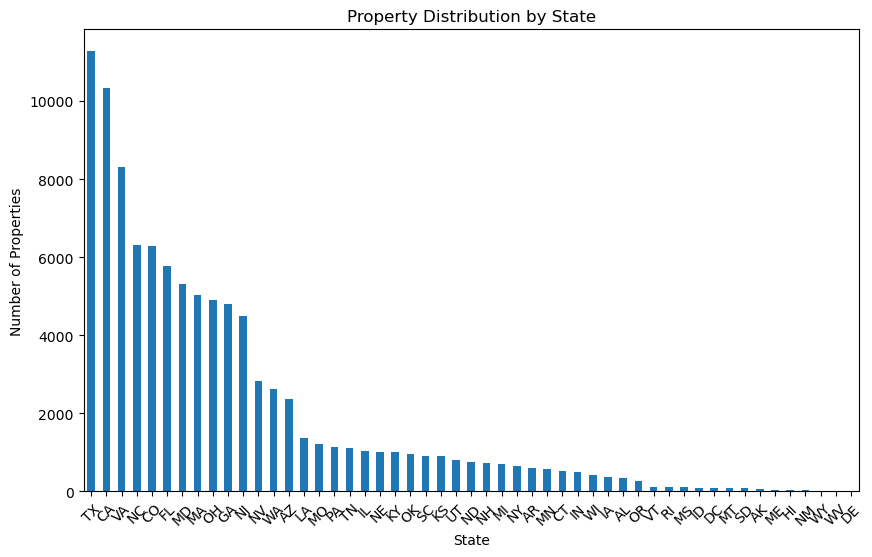

In [64]:
# Bar plot for the 'state' column
df['state'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Property Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()

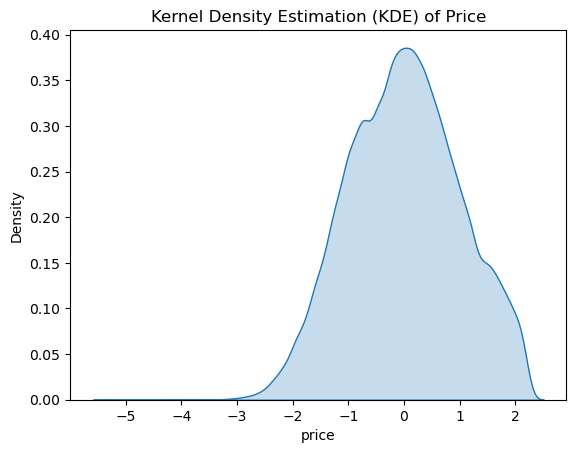

In [65]:
# KDE for 'price'
sns.kdeplot(df['price'], shade=True)
plt.title('Kernel Density Estimation (KDE) of Price')
plt.show()

# 7. Feature Engineering

In [67]:
target_column = 'price'
y = df[target_column]

In [68]:
numerical_features = ['bathrooms', 'bedrooms', 'fee', 'has_photo', 'pets_allowed', 
                      'price', 'square_feet', 'latitude', 'longitude', 'log_price', 
                      'log_square_feet']
numerical_features.remove(target_column)
X = df[numerical_features]

In [69]:
# Identify categorical columns
categorical_columns = ['category', 'title', 'body', 'amenities', 'currency', 
                       'price_display', 'price_type', 'cityname', 'state', 'source', 'time']
# Drop categorical columns since they are not numeric
df_numeric = df.drop(columns=categorical_columns)
# Ensure all remaining features are numeric
numerical_features = df_numeric.columns.tolist()
numerical_features.remove('price') 

In [70]:
# Check data types of all columns
print(df.dtypes)
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

category            object
title               object
body                object
amenities           object
bathrooms          float64
bedrooms           float64
currency            object
fee                 object
has_photo           object
pets_allowed        object
price              float64
price_display       object
price_type          object
square_feet        float64
cityname            object
state               object
latitude           float64
longitude          float64
source              object
time               float64
log_price          float64
log_square_feet    float64
dtype: object
Non-numeric columns: Index(['category', 'title', 'body', 'amenities', 'currency', 'fee',
       'has_photo', 'pets_allowed', 'price_display', 'price_type', 'cityname',
       'state', 'source'],
      dtype='object')


In [71]:
df.drop(columns=['title', 'body', 'amenities'], inplace=True)

In [72]:
from sklearn.preprocessing import LabelEncoder
binary_cols = ['has_photo', 'pets_allowed', 'fee']
label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("Binary columns encoded.")

Binary columns encoded.


In [73]:
df = pd.get_dummies(df, columns=['category', 'currency', 'price_display', 'price_type', 'cityname', 'state', 'source'], drop_first=True)

print("Applied one-hot encoding to categorical variables.")

Applied one-hot encoding to categorical variables.


# 8. feature selection

In [75]:
print(df.isnull().sum())

bathrooms              202
bedrooms              1834
fee                      0
has_photo                0
pets_allowed             0
                      ... 
source_SpreadMyAd        0
source_Z57               0
source_rentbits          0
source_tenantcloud       0
source_vFlyer            0
Length: 7614, dtype: int64


In [76]:
df = df.dropna()

In [77]:
#Check for Missing Values in Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns
print(df[cat_cols].isnull().sum())

Series([], dtype: float64)


In [78]:
#Impute Missing Values in Categorical Columns
from sklearn.impute import SimpleImputer
#Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
#Only apply imputation if there are missing values
if df[cat_cols].isnull().sum().sum() > 0:
    cat_imputer = SimpleImputer(strategy="most_frequent")
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [79]:
#Select Numerical Features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
 # Remove target variable
numerical_features.remove('price') 
X = df[numerical_features]
y = df['price']
# Apply SelectKBest
num_features = min(20, X.shape[1])
selector = SelectKBest(score_func=f_regression, k=num_features)
X_new = selector.fit_transform(X, y)
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['bathrooms', 'bedrooms', 'fee', 'has_photo', 'pets_allowed',
       'square_feet', 'latitude', 'longitude', 'time', 'log_price',
       'log_square_feet'],
      dtype='object')


# 9.Split Data into Training and Testing Sets

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], y, test_size=0.2, random_state=42)

# 10. Feature Scaling

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (72507, 11)
X_test shape: (18127, 11)
y_train shape: (72507,)
y_test shape: (18127,)


In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_features])

In [86]:
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['bathrooms', 'bedrooms', 'fee', 'has_photo', 'pets_allowed', 'price',
       'square_feet', 'latitude', 'longitude', 'time',
       ...
       'source_RealRentals', 'source_RentDigs.com', 'source_RentFeeder',
       'source_RentLingo', 'source_Seattle Rentals', 'source_SpreadMyAd',
       'source_Z57', 'source_rentbits', 'source_tenantcloud', 'source_vFlyer'],
      dtype='object', length=7614)


# 11. Build the ML Models

In [249]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [289]:
#Initialize regressors
lr = LinearRegression()
svr = SVR()
mlp = MLPRegressor()
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()
dt = DecisionTreeRegressor(random_state=42)

In [291]:
# train  models
lr.fit(X_train_scaled, y_train)
svr.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
gbr.fit(X_train_scaled, y_train)
abr.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [181]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [183]:
svr.fit(X_train_scaled, y_train)

SVR()

In [184]:
mlp.fit(X_train_scaled, y_train)

MLPRegressor()

In [292]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [188]:
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [195]:
abr.fit(X_train_scaled, y_train)

AdaBoostRegressor()

In [258]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [229]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_lr = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)


In [277]:
print("Linear Regression Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Linear Regression Metrics:
MAE: 0.005622559100177646
MSE: 6.119911030424485e-05
RMSE: 0.007822986022245269
R2 Score: 0.9999374189632739


In [233]:
y_pred_svr = svr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

print("SVR Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

SVR Metrics:
MAE: 0.034243207893390804
MSE: 0.0020008228615724846
RMSE: 0.0447305584759735
R2 Score: 0.9979539969068186


In [275]:
y_pred_mlp = mlp.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_mlp)
mse = mean_squared_error(y_test, y_pred_mlp)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_mlp)

print("MLP Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MLP Metrics:
MAE: 0.005622559100177646
MSE: 6.119911030424485e-05
RMSE: 0.007822986022245269
R2 Score: 0.9999374189632739


In [293]:
y_pred_rf = rf.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Random Forest Metrics:
MAE: 3.1152562106290526e-05
MSE: 2.120299959028124e-06
RMSE: 0.001456124980565928
R2 Score: 0.9999978318219179


In [269]:
y_pred_gbr = gbr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Gradient Boosting Metrics:
MAE: 0.006033955283949713
MSE: 6.605911393119599e-05
RMSE: 0.008127675801309743
R2 Score: 0.9999324492167538


In [273]:
y_pred_abr = abr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_abr)
mse = mean_squared_error(y_test, y_pred_abr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_abr)

print("AdaBoost Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

AdaBoost Metrics:
MAE: 0.06484377354773585
MSE: 0.0073754477332175225
RMSE: 0.08588042695060105
R2 Score: 0.9924580085695838


In [267]:
y_pred_dt = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Decision Tree Metrics:
MAE: 2.485899826705819e-05
MSE: 1.5024814905850624e-06
RMSE: 0.0012257575170420382
R2 Score: 0.9999984635912372


In [301]:
# Model Evaluation and Comparison
models = {
    "Linear Regression": y_pred_lr,
    "MLP Regressor": y_pred_mlp,
    "AdaBoost": y_pred_abr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gbr,
    "SVR": y_pred_svr
}

In [303]:
for model_name, predictions in models.items():
    print(f"\n{model_name} Metrics:")
    print("MSE:", mean_squared_error(y_test, predictions))
    print("MAE:", mean_absolute_error(y_test, predictions))
    print("R2:", r2_score(y_test, predictions))


Linear Regression Metrics:
MSE: 4.1919799924898266e-06
MAE: 0.0016076489238030368
R2: 0.9999957133616394

MLP Regressor Metrics:
MSE: 6.119911030424485e-05
MAE: 0.005622559100177646
R2: 0.9999374189632739

AdaBoost Metrics:
MSE: 0.0073754477332175225
MAE: 0.06484377354773585
R2: 0.9924580085695838

Decision Tree Metrics:
MSE: 1.5024814905850624e-06
MAE: 2.485899826705819e-05
R2: 0.9999984635912372

Random Forest Metrics:
MSE: 2.120299959028124e-06
MAE: 3.1152562106290526e-05
R2: 0.9999978318219179

Gradient Boosting Metrics:
MSE: 6.605911393119599e-05
MAE: 0.006033955283949713
R2: 0.9999324492167538

SVR Metrics:
MSE: 0.0020008228615724846
MAE: 0.034243207893390804
R2: 0.9979539969068186


In [309]:
models = {
    "Linear Regression": LinearRegression(),
    "MLPRegresson": MLPRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "SVR": SVR()
}

 # 12. Model Evaluation

In [311]:
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

In [312]:
# Evaluate models
results = {}
for name, pred in predictions.items():
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    results[name] = {"MSE": mse, "MAE": mae, "R²": r2}

In [313]:
#results
for name, metrics in results.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, MAE={metrics['MAE']:.4f}, R²={metrics['R²']:.4f}")

Linear Regression: MSE=0.0000, MAE=0.0016, R²=1.0000
MLPRegresson: MSE=0.0000, MAE=0.0048, R²=1.0000
AdaBoostRegressor: MSE=0.0071, MAE=0.0650, R²=0.9927
Decision Tree Regressor: MSE=0.0000, MAE=0.0000, R²=1.0000
Random Forest Regressor: MSE=0.0000, MAE=0.0000, R²=1.0000
Gradient Boosting Regressor: MSE=0.0001, MAE=0.0060, R²=0.9999
SVR: MSE=0.0016, MAE=0.0313, R²=0.9984


# 13. Hyperparameter Tuning

In [318]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid,
                              cv=5,
                              scoring='r2',
                              n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest Regressor:", grid_search_rf.best_params_)
print("Best Cross-Validation R2 Score:", grid_search_rf.best_score_)

Best Parameters for Random Forest Regressor: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation R2 Score: 0.9999660927006403


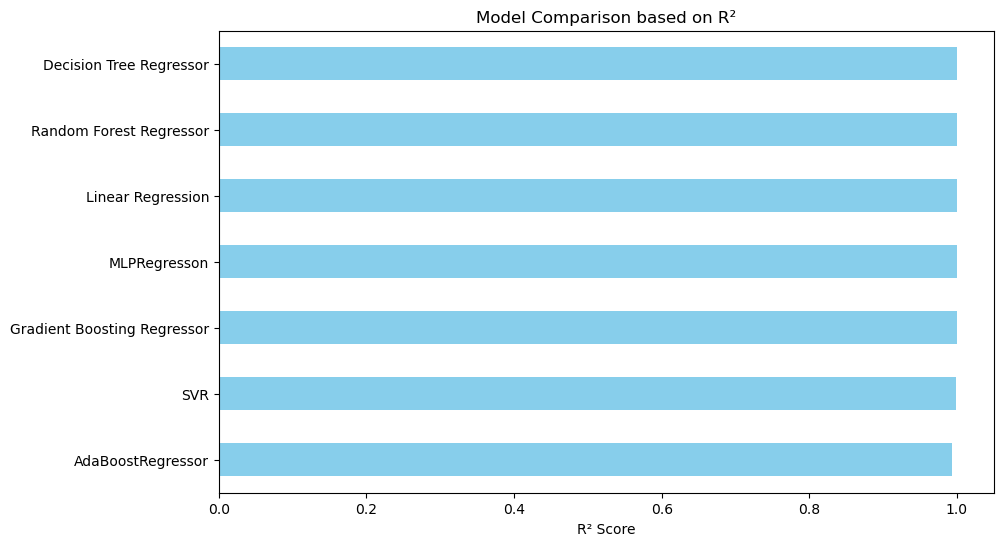

In [326]:
# Convert results to DataFrame
df_results = pd.DataFrame(results).T

# Plot R² Scores
df_results['R²'].sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('R² Score')
plt.title('Model Comparison based on R²')
plt.show()